In [1]:
import os
import io
import sys
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
import PIL

prj_dir = os.path.abspath(os.getcwd() + '/..')
print(prj_dir)
sys.path.append(prj_dir)

/Users/raul.sanchez/data_scientia/rulo_mota_omath


In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import shap
from sklearn.model_selection import train_test_split

from src import config
from src.features import X_features
from src.features import banxico_mun_income_remittances

In [3]:
path = os.path.join(
    config.PRJ_DIR,
    'data/processed/X.csv')

data = pd.read_csv(path)
data.set_index('id', inplace=True)

remittances = banxico_mun_income_remittances.get()

In [4]:
data.rename(columns={
    'captacion__cuentas_transaccionales_tradicionales': 'captacion_cnts_transacc_trad',
    'captacion__depositos_a_plazo': 'captacion_depositos_plazo',
    'numero_de_puntos_de_acceso__total_sucursales': 'num_ptos_acceso_tot_sucursales',
    'indicadores_demograficos_(puntos_de_acceso_por_cada_10000_adultos)__sucursales_banca_comercial': 'pntos_acceso_sucursales_banca_com',
    'credito__nomina (2)': 'credito_nomina',
    'credito__hipotecario (2)': 'credito_hipotecario',
    'credito__automotriz (2)': 'credito_automotriz',
    'numero_de_puntos_de_acceso__contratos_que_utilizan_banca_movil_delta': 'num_ptos_acceso_contratos_banca_movil_delta',
    'credito__tarjetas_de_credito': 'tarjetas_de_credito',
    'socios_-_socap__mujeres': 'socios_socap_mujeres',
    'credito__abcd_delta': 'credito_abcd_delta',
    'transacciones__en_cajeros_automaticos_delta.1': 'trans_cajeros_aut_delta.1',
    'captacion__cuentas_transaccionales_tradicionales (2)': 'captacion_ctas_trans_tradicionales',
    'socios_-_socap__hombres': 'socios_socap_hombres',
    'socios_-_socap__mujeres_delta': 'socios_socap_mujeres_delta',
}, inplace=True)

In [5]:
X_2019 = data[data['year'] == 2019].drop(
    ['year', 'mun', 'year.1','year.2', 'mun.1', 'mun.2'], 
    axis=1).apply(lambda x: np.log1p(x))

valid_ids_2019 = list(set(remittances.index).intersection(X_2019.index))

X_2019 = X_2019.loc[valid_ids_2019]
y_2019 = remittances.loc[valid_ids_2019]['Remittance Amount Million USD log1p']

divide by zero encountered in log1p
invalid value encountered in log1p


In [6]:
X_2020 = data[data['year'] == 2020].drop(
    ['year', 'mun', 'year.1','year.2', 'mun.1', 'mun.2'], 
    axis=1).apply(lambda x: np.log1p(x))

valid_ids_2020 = list(set(remittances.index).intersection(X_2020.index))

X_2020 = X_2020.loc[valid_ids_2020]
y_2020 = remittances.loc[valid_ids_2020]['Remittance Amount Million USD log1p']

divide by zero encountered in log1p
invalid value encountered in log1p


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_2019, y_2019, 
    train_size=.8,
    random_state=1)

eval_set = [
    (X_2020, y_2020),
    (X_train, y_train),
    (X_test, y_test)]

model = XGBRegressor(
    learning_rate=0.01, 
    max_depth=8, 
    n_estimators=1000,
    random_state=1)

model.fit(
    X_train, y_train,
    eval_set=eval_set,
    early_stopping_rounds=10,
    verbose=True)

[0]	validation_0-rmse:2.28915	validation_1-rmse:2.20169	validation_2-rmse:2.17850
[1]	validation_0-rmse:2.27065	validation_1-rmse:2.18177	validation_2-rmse:2.15947
[2]	validation_0-rmse:2.25269	validation_1-rmse:2.16205	validation_2-rmse:2.14073
[3]	validation_0-rmse:2.23488	validation_1-rmse:2.14248	validation_2-rmse:2.12238
[4]	validation_0-rmse:2.21723	validation_1-rmse:2.12315	validation_2-rmse:2.10389
[5]	validation_0-rmse:2.19994	validation_1-rmse:2.10399	validation_2-rmse:2.08580
[6]	validation_0-rmse:2.18350	validation_1-rmse:2.08481	validation_2-rmse:2.06849
[7]	validation_0-rmse:2.16713	validation_1-rmse:2.06580	validation_2-rmse:2.05132
[8]	validation_0-rmse:2.15068	validation_1-rmse:2.04702	validation_2-rmse:2.03385
[9]	validation_0-rmse:2.13413	validation_1-rmse:2.02840	validation_2-rmse:2.01660
[10]	validation_0-rmse:2.11773	validation_1-rmse:2.00996	validation_2-rmse:1.99887
[11]	validation_0-rmse:2.10148	validation_1-rmse:1.99172	validation_2-rmse:1.98175
[12]	validatio

[99]	validation_0-rmse:1.20803	validation_1-rmse:0.92453	validation_2-rmse:1.03537
[100]	validation_0-rmse:1.20205	validation_1-rmse:0.91682	validation_2-rmse:1.02932
[101]	validation_0-rmse:1.19609	validation_1-rmse:0.90920	validation_2-rmse:1.02330
[102]	validation_0-rmse:1.19073	validation_1-rmse:0.90173	validation_2-rmse:1.01766
[103]	validation_0-rmse:1.18534	validation_1-rmse:0.89425	validation_2-rmse:1.01181
[104]	validation_0-rmse:1.17959	validation_1-rmse:0.88682	validation_2-rmse:1.00623
[105]	validation_0-rmse:1.17380	validation_1-rmse:0.87957	validation_2-rmse:1.00074
[106]	validation_0-rmse:1.16861	validation_1-rmse:0.87234	validation_2-rmse:0.99523
[107]	validation_0-rmse:1.16349	validation_1-rmse:0.86515	validation_2-rmse:0.98968
[108]	validation_0-rmse:1.15782	validation_1-rmse:0.85815	validation_2-rmse:0.98430
[109]	validation_0-rmse:1.15234	validation_1-rmse:0.85119	validation_2-rmse:0.97914
[110]	validation_0-rmse:1.14839	validation_1-rmse:0.84423	validation_2-rmse:0

[197]	validation_0-rmse:0.88442	validation_1-rmse:0.44087	validation_2-rmse:0.70916
[198]	validation_0-rmse:0.88284	validation_1-rmse:0.43793	validation_2-rmse:0.70783
[199]	validation_0-rmse:0.88117	validation_1-rmse:0.43506	validation_2-rmse:0.70632
[200]	validation_0-rmse:0.87945	validation_1-rmse:0.43219	validation_2-rmse:0.70486
[201]	validation_0-rmse:0.87805	validation_1-rmse:0.42931	validation_2-rmse:0.70341
[202]	validation_0-rmse:0.87642	validation_1-rmse:0.42651	validation_2-rmse:0.70213
[203]	validation_0-rmse:0.87507	validation_1-rmse:0.42369	validation_2-rmse:0.70071
[204]	validation_0-rmse:0.87372	validation_1-rmse:0.42092	validation_2-rmse:0.69943
[205]	validation_0-rmse:0.87211	validation_1-rmse:0.41817	validation_2-rmse:0.69815
[206]	validation_0-rmse:0.87058	validation_1-rmse:0.41540	validation_2-rmse:0.69685
[207]	validation_0-rmse:0.86927	validation_1-rmse:0.41273	validation_2-rmse:0.69561
[208]	validation_0-rmse:0.86800	validation_1-rmse:0.41003	validation_2-rmse:

[295]	validation_0-rmse:0.79572	validation_1-rmse:0.25045	validation_2-rmse:0.64194
[296]	validation_0-rmse:0.79530	validation_1-rmse:0.24903	validation_2-rmse:0.64165
[297]	validation_0-rmse:0.79482	validation_1-rmse:0.24779	validation_2-rmse:0.64137
[298]	validation_0-rmse:0.79434	validation_1-rmse:0.24659	validation_2-rmse:0.64115
[299]	validation_0-rmse:0.79391	validation_1-rmse:0.24524	validation_2-rmse:0.64089
[300]	validation_0-rmse:0.79352	validation_1-rmse:0.24392	validation_2-rmse:0.64067
[301]	validation_0-rmse:0.79311	validation_1-rmse:0.24275	validation_2-rmse:0.64041
[302]	validation_0-rmse:0.79278	validation_1-rmse:0.24143	validation_2-rmse:0.64017
[303]	validation_0-rmse:0.79246	validation_1-rmse:0.24013	validation_2-rmse:0.63995
[304]	validation_0-rmse:0.79200	validation_1-rmse:0.23895	validation_2-rmse:0.63982
[305]	validation_0-rmse:0.79169	validation_1-rmse:0.23769	validation_2-rmse:0.63959
[306]	validation_0-rmse:0.79139	validation_1-rmse:0.23643	validation_2-rmse:

[393]	validation_0-rmse:0.77219	validation_1-rmse:0.15783	validation_2-rmse:0.62478
[394]	validation_0-rmse:0.77204	validation_1-rmse:0.15714	validation_2-rmse:0.62463
[395]	validation_0-rmse:0.77191	validation_1-rmse:0.15665	validation_2-rmse:0.62457
[396]	validation_0-rmse:0.77180	validation_1-rmse:0.15624	validation_2-rmse:0.62453
[397]	validation_0-rmse:0.77165	validation_1-rmse:0.15548	validation_2-rmse:0.62439
[398]	validation_0-rmse:0.77153	validation_1-rmse:0.15495	validation_2-rmse:0.62434
[399]	validation_0-rmse:0.77133	validation_1-rmse:0.15416	validation_2-rmse:0.62423
[400]	validation_0-rmse:0.77124	validation_1-rmse:0.15369	validation_2-rmse:0.62418
[401]	validation_0-rmse:0.77113	validation_1-rmse:0.15315	validation_2-rmse:0.62402
[402]	validation_0-rmse:0.77104	validation_1-rmse:0.15261	validation_2-rmse:0.62390
[403]	validation_0-rmse:0.77095	validation_1-rmse:0.15217	validation_2-rmse:0.62380
[404]	validation_0-rmse:0.77080	validation_1-rmse:0.15147	validation_2-rmse:

[491]	validation_0-rmse:0.76438	validation_1-rmse:0.11429	validation_2-rmse:0.62004
[492]	validation_0-rmse:0.76433	validation_1-rmse:0.11405	validation_2-rmse:0.62001
[493]	validation_0-rmse:0.76432	validation_1-rmse:0.11364	validation_2-rmse:0.62003
[494]	validation_0-rmse:0.76427	validation_1-rmse:0.11341	validation_2-rmse:0.62003
[495]	validation_0-rmse:0.76424	validation_1-rmse:0.11316	validation_2-rmse:0.61999
[496]	validation_0-rmse:0.76423	validation_1-rmse:0.11277	validation_2-rmse:0.61999
[497]	validation_0-rmse:0.76419	validation_1-rmse:0.11263	validation_2-rmse:0.61996
[498]	validation_0-rmse:0.76416	validation_1-rmse:0.11234	validation_2-rmse:0.61995
[499]	validation_0-rmse:0.76412	validation_1-rmse:0.11209	validation_2-rmse:0.61990
[500]	validation_0-rmse:0.76407	validation_1-rmse:0.11181	validation_2-rmse:0.61989
[501]	validation_0-rmse:0.76401	validation_1-rmse:0.11156	validation_2-rmse:0.61987
[502]	validation_0-rmse:0.76397	validation_1-rmse:0.11131	validation_2-rmse:

[589]	validation_0-rmse:0.76085	validation_1-rmse:0.08997	validation_2-rmse:0.61778
[590]	validation_0-rmse:0.76082	validation_1-rmse:0.08987	validation_2-rmse:0.61774
[591]	validation_0-rmse:0.76077	validation_1-rmse:0.08962	validation_2-rmse:0.61770
[592]	validation_0-rmse:0.76075	validation_1-rmse:0.08957	validation_2-rmse:0.61768
[593]	validation_0-rmse:0.76071	validation_1-rmse:0.08930	validation_2-rmse:0.61760
[594]	validation_0-rmse:0.76068	validation_1-rmse:0.08927	validation_2-rmse:0.61760
[595]	validation_0-rmse:0.76063	validation_1-rmse:0.08903	validation_2-rmse:0.61755
[596]	validation_0-rmse:0.76058	validation_1-rmse:0.08888	validation_2-rmse:0.61753
[597]	validation_0-rmse:0.76057	validation_1-rmse:0.08874	validation_2-rmse:0.61752
[598]	validation_0-rmse:0.76053	validation_1-rmse:0.08860	validation_2-rmse:0.61749
[599]	validation_0-rmse:0.76050	validation_1-rmse:0.08840	validation_2-rmse:0.61747
[600]	validation_0-rmse:0.76049	validation_1-rmse:0.08839	validation_2-rmse:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
rmse = []
for _, res in model.evals_result_.items():
    rmse.append(res['rmse'][-1])

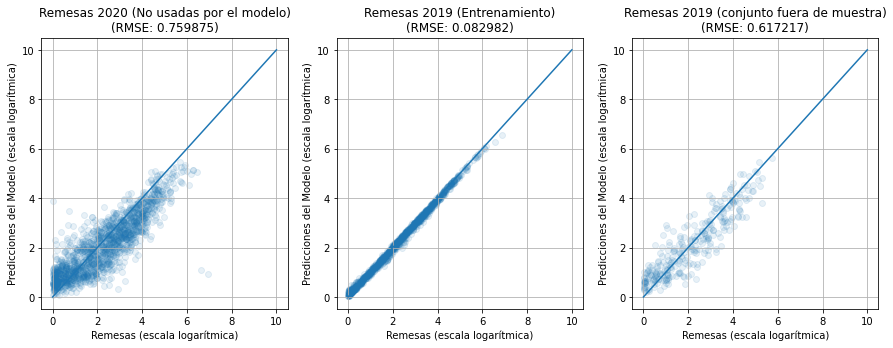

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
eval_set_name = [
    'Remesas 2020 (No usadas por el modelo)\n(RMSE: %s)', 
    'Remesas 2019 (Entrenamiento)\n(RMSE: %s)', 
    'Remesas 2019 (conjunto fuera de muestra)\n(RMSE: %s)']

for it, (X, y_true) in enumerate(eval_set):
    y_pred = model.predict(X)
    
    ax[it].scatter(
        y_true.values,
        y_pred,
        alpha=.1)
    ax[it].set_title(eval_set_name[it] % rmse[it])
    
    ax[it].plot([0, 10], [0, 10])
    ax[it].set_xlabel('Remesas (escala logarítmica)')
    ax[it].set_ylabel('Predicciones del Modelo (escala logarítmica)')
    
    ax[it].grid()

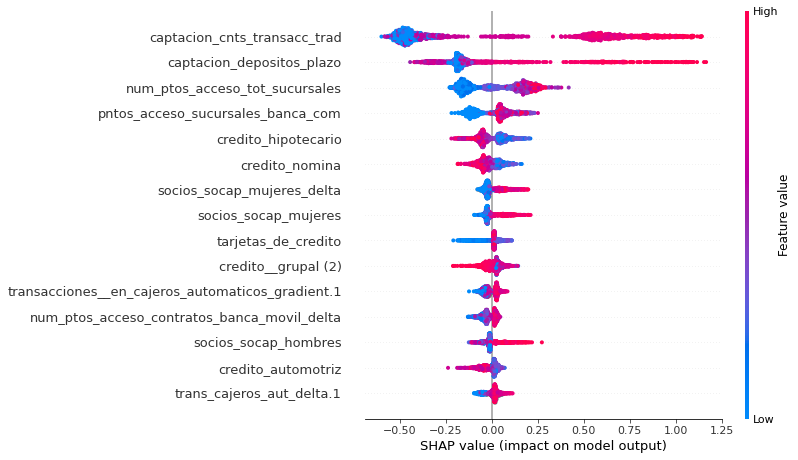

In [10]:
explainer = shap.TreeExplainer(model)

shap_values = explainer(
    X_2020)

features_shap_values = pd.DataFrame(
    shap_values.values,
    columns=X_2020.columns)

shap.summary_plot(
    shap_values, 
    X_2020, 
    max_display=15)

In [11]:
feature_list = list(features_shap_values.abs().sum().sort_values().index[-15:])

invalid value encountered in subtract


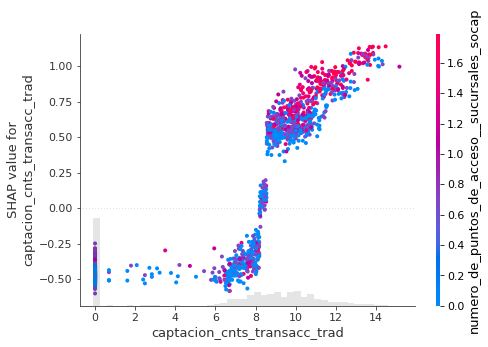

invalid value encountered in subtract


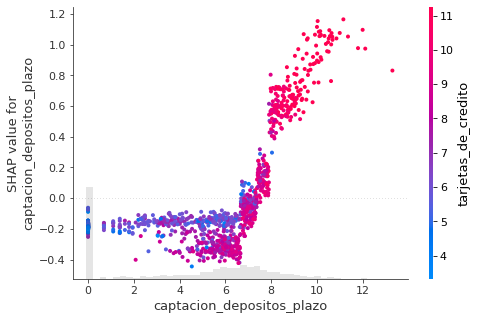

invalid value encountered in subtract


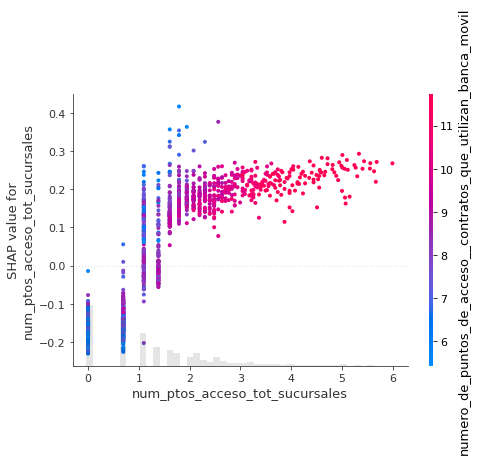

invalid value encountered in subtract


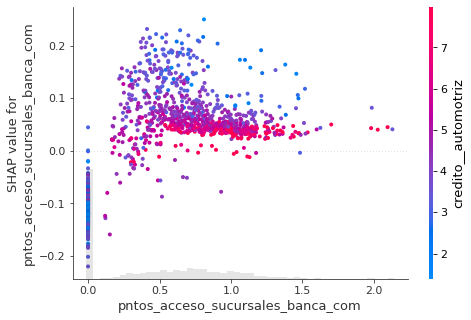

invalid value encountered in subtract


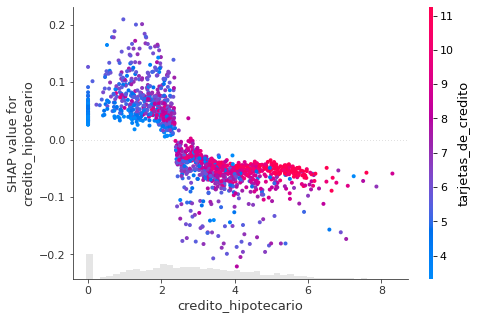

invalid value encountered in subtract


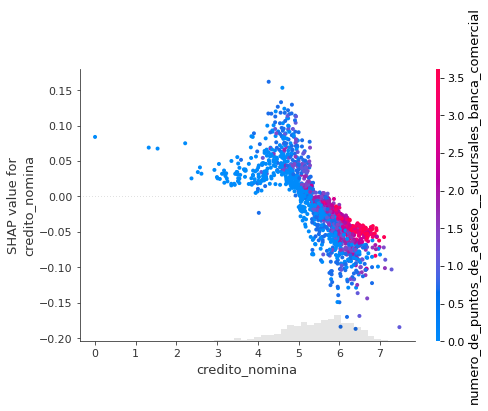

invalid value encountered in subtract


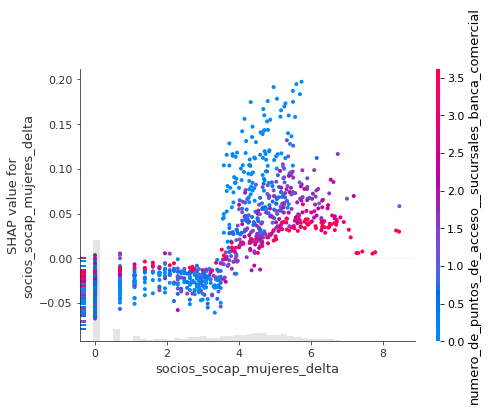

invalid value encountered in subtract


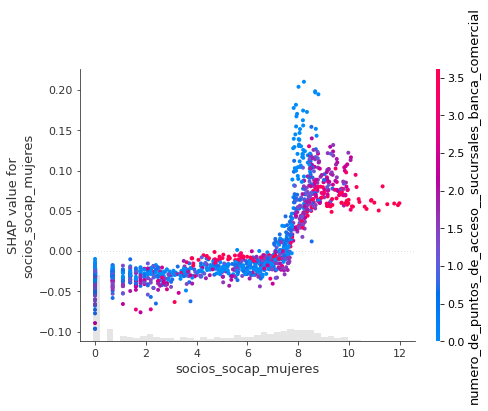

invalid value encountered in subtract


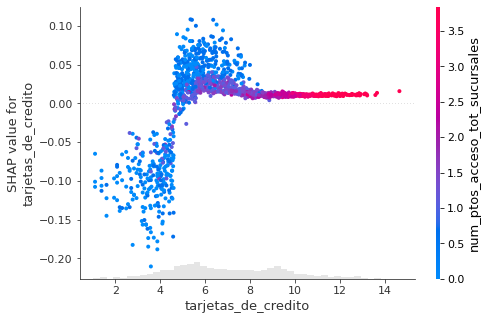

invalid value encountered in subtract


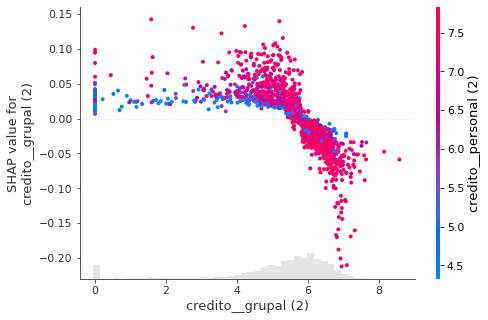

invalid value encountered in subtract


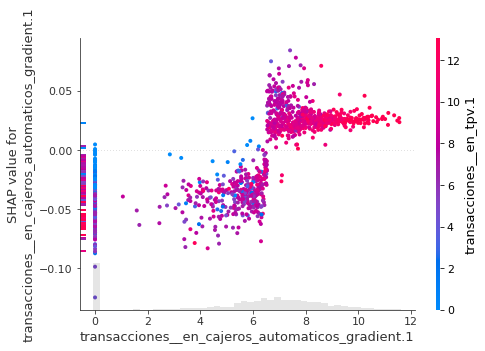

invalid value encountered in subtract


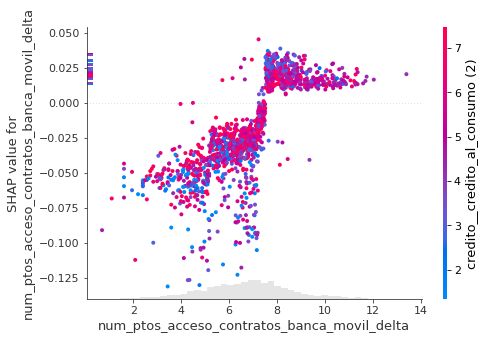

invalid value encountered in subtract


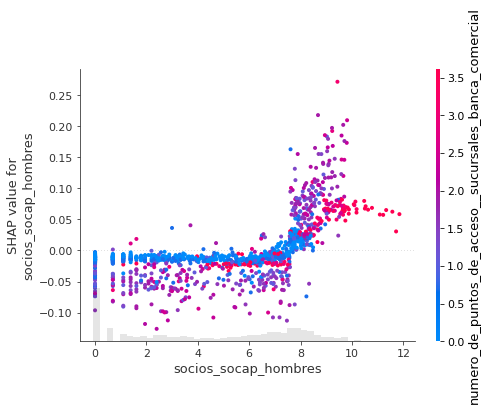

invalid value encountered in subtract


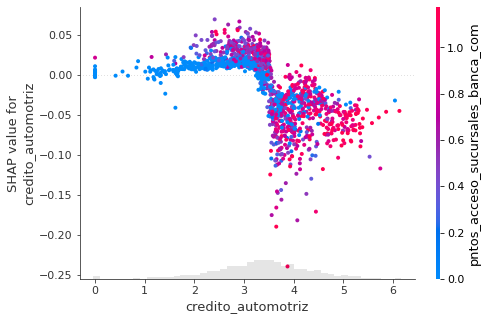

invalid value encountered in subtract


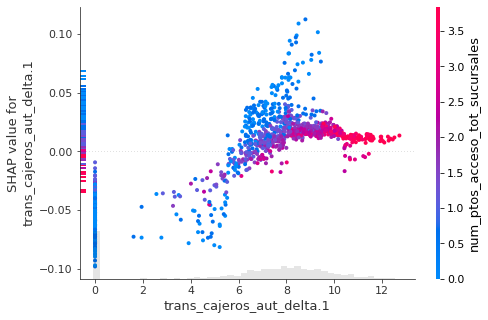

In [12]:
for f in reversed(feature_list):
    shap.plots.scatter(
        shap_values[:, f],
        color=shap_values)